## Источники

- [`investing.com`](https://ru.investing.com/) - котировки акций и индексов
- [`cbr.ru`](https://www.cbr.ru/) - курсы валют

Собрать данные.
1. Процентные ставки на разные сроки (от 0 до 30 лет) за период с 1 января 2021 г. по 1 января 2025 г.
2. Описания 5 государственных облигаций РФ (расписания выплат). Критерии — государственные облигации с полностью известными размерами выплат (не привязанные к показателям), без оферт, со сроком погашения после 1 января 2025 г.:
3. Рыночные котировки этих облигаций за период с 1 января 2021 г. по 1 января 2025 г.
4. ~~Котировки 10 российских акций за тот же период.~~
5. ~~Значения индекса МосБиржи, индекса РТС, цены на нефть Brent и курса доллара и евро за тот же период.~~
6. Котировки фьючерса и опционов на фьючерс на один выбранный актив из предыдущего пункта — выбрать один торговый день за 2024 год. Срок погашения и фьючерса, и опционов взять ближайшие к выбранному дню, но не ближе, чем 1 месяц. Опционы и Put, и Call — только для бонусного задания.

In [38]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [35]:
path_data = 'data/'

In [39]:
def make_ax_better(ax, locators=()):
    """
        Функция добавляет сетку, убирает края и делает minor ticks
    """
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if 'x' in locators:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
    if 'y' in locators:
        ax.yaxis.set_minor_locator(AutoMinorLocator())
    if locators:
        ax.tick_params(which='minor', length=2.5)
        ax.tick_params(which='major', length=5)
        ax.grid(which='minor', linewidth=0.15, color='tab:grey', alpha=0.3)
    ax.grid(linewidth=0.5, color='tab:grey', alpha=0.3)
    ax.set_axisbelow(True)

def make_str_bold(s):
    """
        Функция для выделения строки жирным для print
    """
    return '\033[1m' + str(s) + '\033[0m'

# Загрузка данных

## Акции

In [52]:
share_names = [
    'SBER',
    'YDEX',
    'ROSN',
    'PLZL',
    'LKOH',
    'GAZP',
    'NVTK',
    'MOEX',
    'CHMF',
    'GMKN'
]

In [34]:
data = []
for ticker in share_names:
    filepath = path_data + ticker + '.csv'
    cur_df = pd.read_csv(filepath, usecols=['Дата', 'Цена']).drop_duplicates()
    cur_df['Дата'] = pd.to_datetime(cur_df['Дата'], format='%d.%m.%Y')
    cur_df['Цена'] = cur_df['Цена'].astype(str).str.rstrip('.0').str.replace('.', '').str.replace(',', '.').astype(float)
    n_duplicates = cur_df.shape[0] - cur_df['Дата'].nunique()
    if n_duplicates:
        print(filename, f'число дубликатов: {n_duplicates}, усредняем цены за дублирующиеся даты')
        cur_df = cur_df.groupby(['Дата'], as_index=False)['Цена'].mean()
    cur_df = cur_df.set_index('Дата').rename(columns={'Цена': ticker})
    data.append(cur_df)
data = pd.concat(data, axis=1) 
print(data.shape)
data = data[
    (data.index <= pd.Timestamp('2025-01-01'))
]
data.tail()

Прошлые данные - GMKN (2).csv число дубликатов: 3, усредняем цены за дублирующиеся даты
Прошлые данные - GMKN (2).csv число дубликатов: 2, усредняем цены за дублирующиеся даты
(1000, 10)


,SBER,YDEX,ROSN,PLZL,LKOH,GAZP,NVTK,MOEX,CHMF,GMKN
Дата,,,,,,,,,,
2024-12-25,271.69,3790.0,581.95,13973.5,6987.5,128.11,929.4,196.61,1161.8,108.0
2024-12-26,269.56,3785.0,579.10,14001.0,7003.0,126.89,949.8,194.08,1174.4,109.7
2024-12-27,271.20,3848.0,591.00,14139.0,6990.5,127.79,949.2,192.45,1186.2,111.0
2024-12-28,272.83,3928.5,596.00,13926.0,6998.0,129.60,951.8,192.61,1232.2,113.8
2024-12-30,279.43,3994.0,606.05,13981.0,7235.0,133.12,996.0,199.22,1337.4,115.5


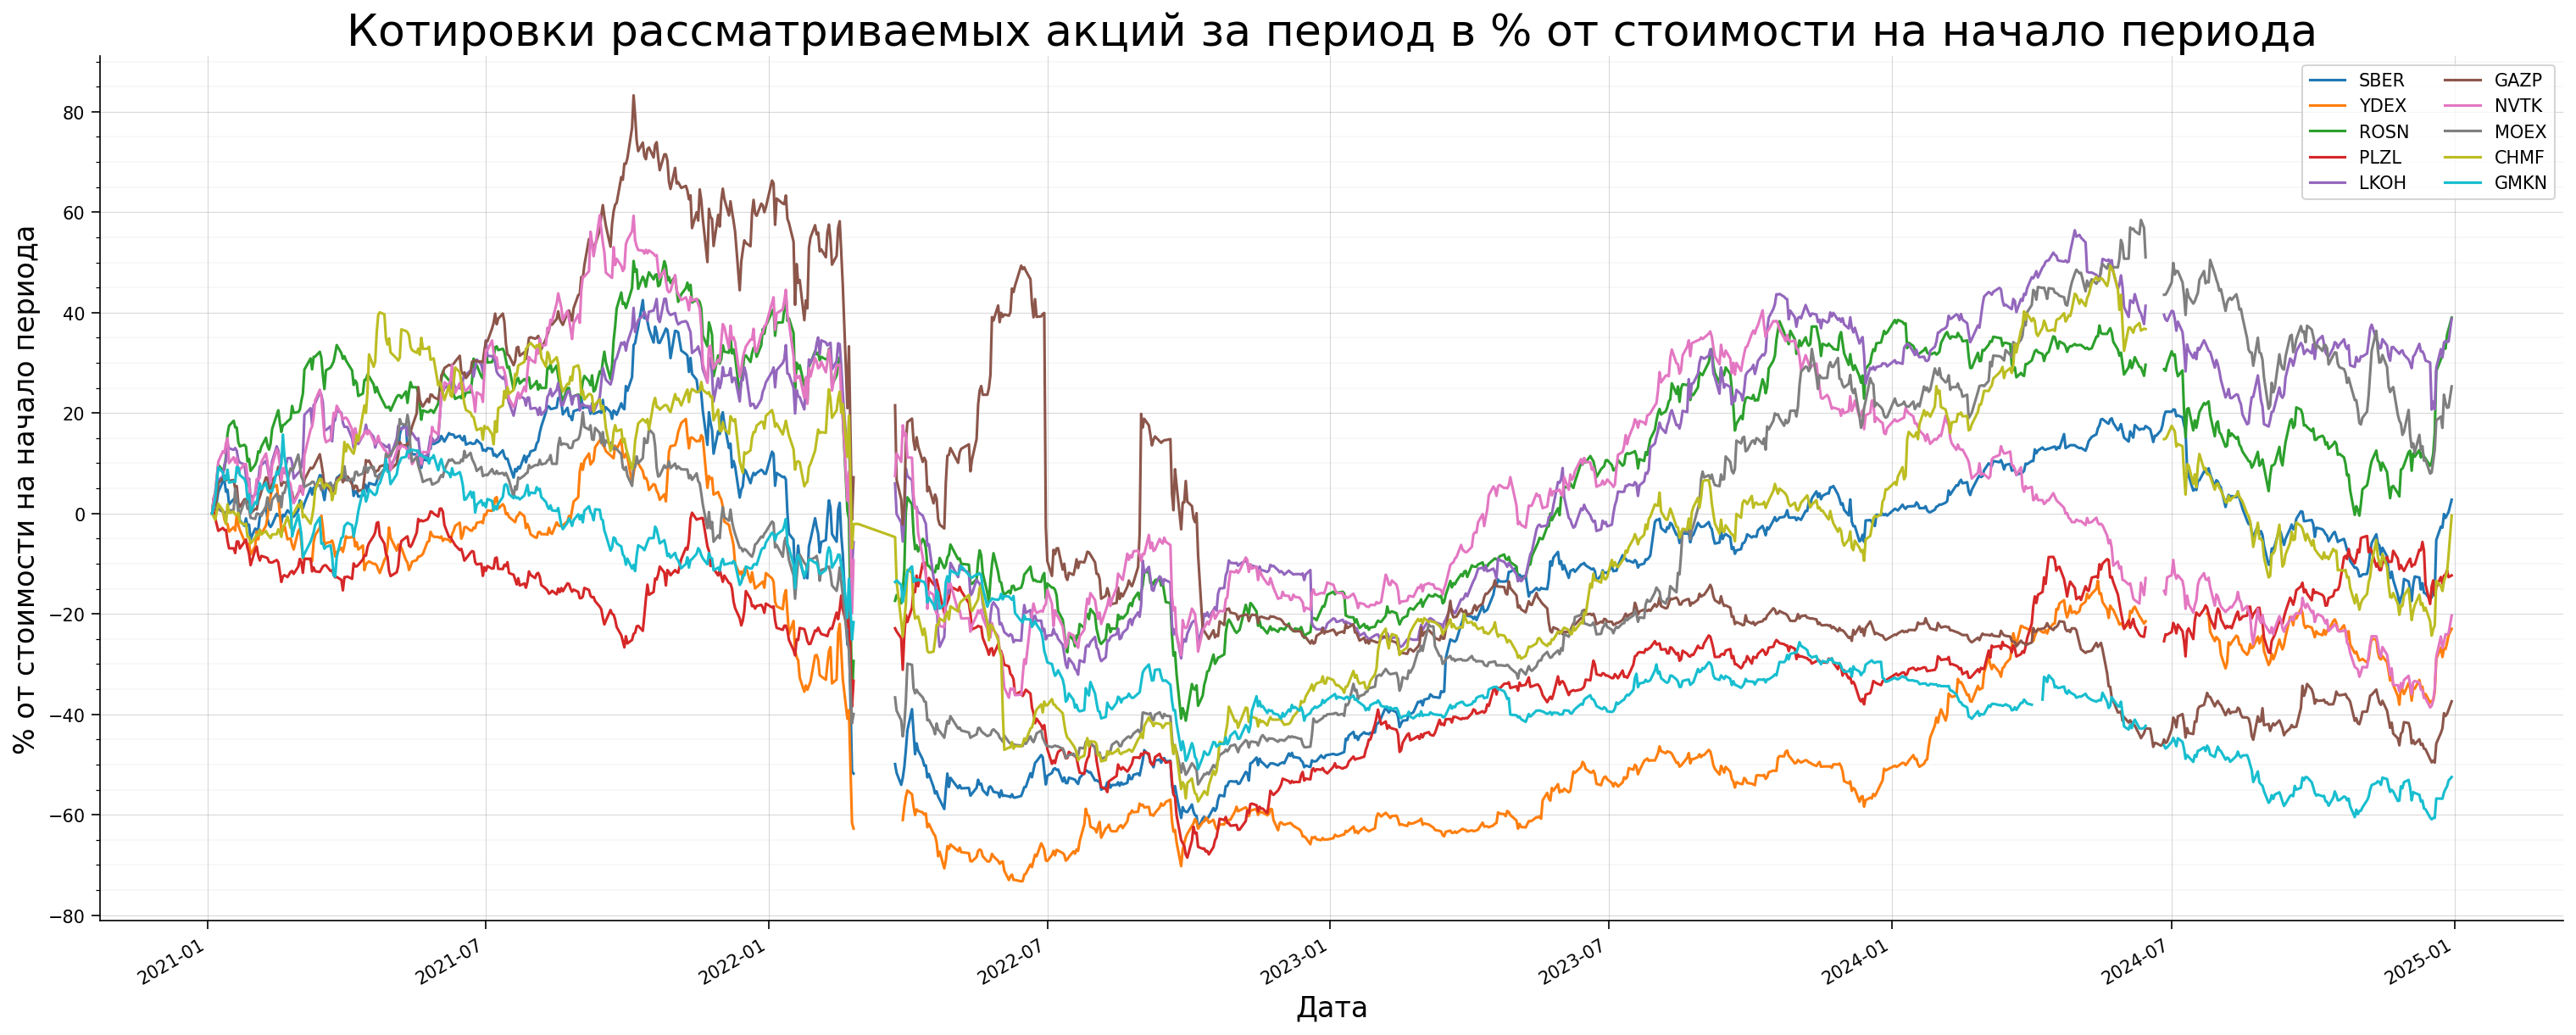

In [51]:
df = data.copy()
df = (df / df.iloc[0] - 1) * 100
fig, ax = plt.subplots(figsize=(25, 10), dpi=150)
df.plot(ax=ax)
make_ax_better(ax, locators=['y'])
ax.legend(ncols=2)
ax.set_title('Котировки рассматриваемых акций за период в % от стоимости на начало периода', fontsize=25)
ax.set_ylabel('% от стоимости на начало периода', fontsize=16)
ax.set_xlabel('Дата', fontsize=16)
plt.show()